![Header image showing soccer field](header_image.png)

# Soccer Through the Ages

This dataset contains information on international soccer games throughout the years. It includes results of soccer games and information about the players who scored the goals. The dataset contains data from 1872 up to 2023.

### 💾 The data

- `data/results.csv` - CSV with results of soccer games between 1872 and 2023
  - `home_score` - The score of the home team, excluding penalty shootouts
  - `away_score` - The score of the away team, excluding penalty shootouts
  - `tournament` - The name of the tournament
  - `city` - The name of the city where the game was played
  - `country` - The name of the country where the game was played
  - `neutral` - Whether the game was played at a neutral venue or not
- `data/shootouts.csv` - CSV with results of penalty shootouts in the soccer games
  - `winner` - The team that won the penalty shootout 
- `data/goalscorers.csv` - CSV with information on goal scorers of some of the soccer games in the results CSV
  - `team` - The team that scored the goal
  - `scorer` - The player who scored the goal
  - `minute` - The minute in the game when the goal was scored
  - `own_goal` - Whether it was an own goal or not
  - `penalty` - Whether the goal was scored as a penalty or not

The following columns can be found in all datasets:

- `date` - The date of the soccer game
- `home_team` - The team that played at home
- `away_team` - The team that played away

These shared columns fully identify the game that was played and can be used to join data between the different CSV files.

Source: [GitHub](https://github.com/martj42/international_results/tree/baf917b948eec00f659d2f187c33c13547f7adc4)

### 📊 **Some guiding questions and visualization to help explore this data:**

1. Which are the 15 countries that have won the most games since 1960? Show them in a horizontal bar plot.
2. How many goals are scored in total in each minute of the game? Show this in a bar plot, with the minutes on the x-axis. If you're up for the challenge, you could even create an animated Plotly plot that shows how the distribution has changed over the years.
3. Which 10 players have scored the most hat-tricks?
4. What is the proportion of games won by each team at home and away? What is the difference between the proportions?
5. How many games have been won by the home team? And by the away team?

In [1]:
import pandas as pd

results = pd.read_csv("data/results.csv")

In [2]:
goal_scorers = pd.read_csv('data/goalscorers.csv')
goal_scorers['date'] = pd.to_datetime(goal_scorers['date'])
categorical_columns_gs = goal_scorers.select_dtypes(include=['object']).columns.tolist()
goal_scorers[categorical_columns_gs] = goal_scorers[categorical_columns_gs].astype('category')
print(goal_scorers.info())
display(goal_scorers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41113 entries, 0 to 41112
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       41113 non-null  datetime64[ns]
 1   home_team  41113 non-null  category      
 2   away_team  41113 non-null  category      
 3   team       41113 non-null  category      
 4   scorer     41064 non-null  category      
 5   minute     40855 non-null  float64       
 6   own_goal   41113 non-null  bool          
 7   penalty    41113 non-null  bool          
dtypes: bool(2), category(4), datetime64[ns](1), float64(1)
memory usage: 1.7 MB
None


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [3]:
results['date'] = pd.to_datetime(results['date'])
categorical_columns = results.select_dtypes(include=['object']).columns.tolist()
results[categorical_columns] = results[categorical_columns].astype('category')
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44934 entries, 0 to 44933
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44934 non-null  datetime64[ns]
 1   home_team   44934 non-null  category      
 2   away_team   44934 non-null  category      
 3   home_score  44934 non-null  int64         
 4   away_score  44934 non-null  int64         
 5   tournament  44934 non-null  category      
 6   city        44934 non-null  category      
 7   country     44934 non-null  category      
 8   neutral     44934 non-null  bool          
dtypes: bool(1), category(5), datetime64[ns](1), int64(2)
memory usage: 1.6 MB


winner
Brazil         627
South Korea    569
Mexico         544
Germany        522
England        496
Argentina      478
Russia         455
Spain          455
Zambia         450
Italy          435
Sweden         433
France         426
Egypt          425
Poland         420
Netherlands    392
Name: count, dtype: int64


<Axes: ylabel='winner'>

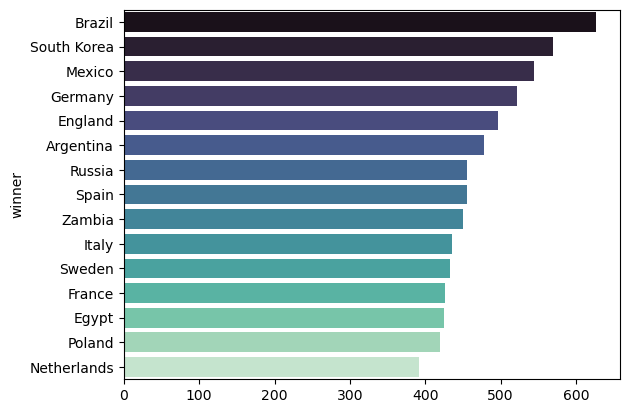

In [4]:
# 1. Which are the 15 countries that have won the most games since 1960? Show them in a horizontal bar plot.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

results['winner'] = np.where(results['home_score'] > results['away_score'], results['home_team'], results['away_team'])

from_1960 = results[results['date'].dt.year >= 1960]

sorted_winners = from_1960['winner'].value_counts().head(15)
print(sorted_winners)
sns.barplot(x=sorted_winners.values, y=sorted_winners.index, palette='mako')

In [5]:
#2. How many goals are scored in total in each minute of the game? Show this in a bar plot, with the minutes on the x-axis. If you're up for the challenge, you could even create an animated Plotly plot that shows how the distribution has changed over the years.
import plotly.express as px

goal_scorers['year'] = goal_scorers['date'].dt.year
agg_goals = goal_scorers.groupby(['year', 'minute']).size().reset_index(name='goals')

fig = px.bar(agg_goals,
            x='minute',
             y='goals',
             animation_frame='year',
             range_y=[0, agg_goals['goals'].max()+5],
             title='Goals Scored by Minute Over the Years',
            )
fig.show()

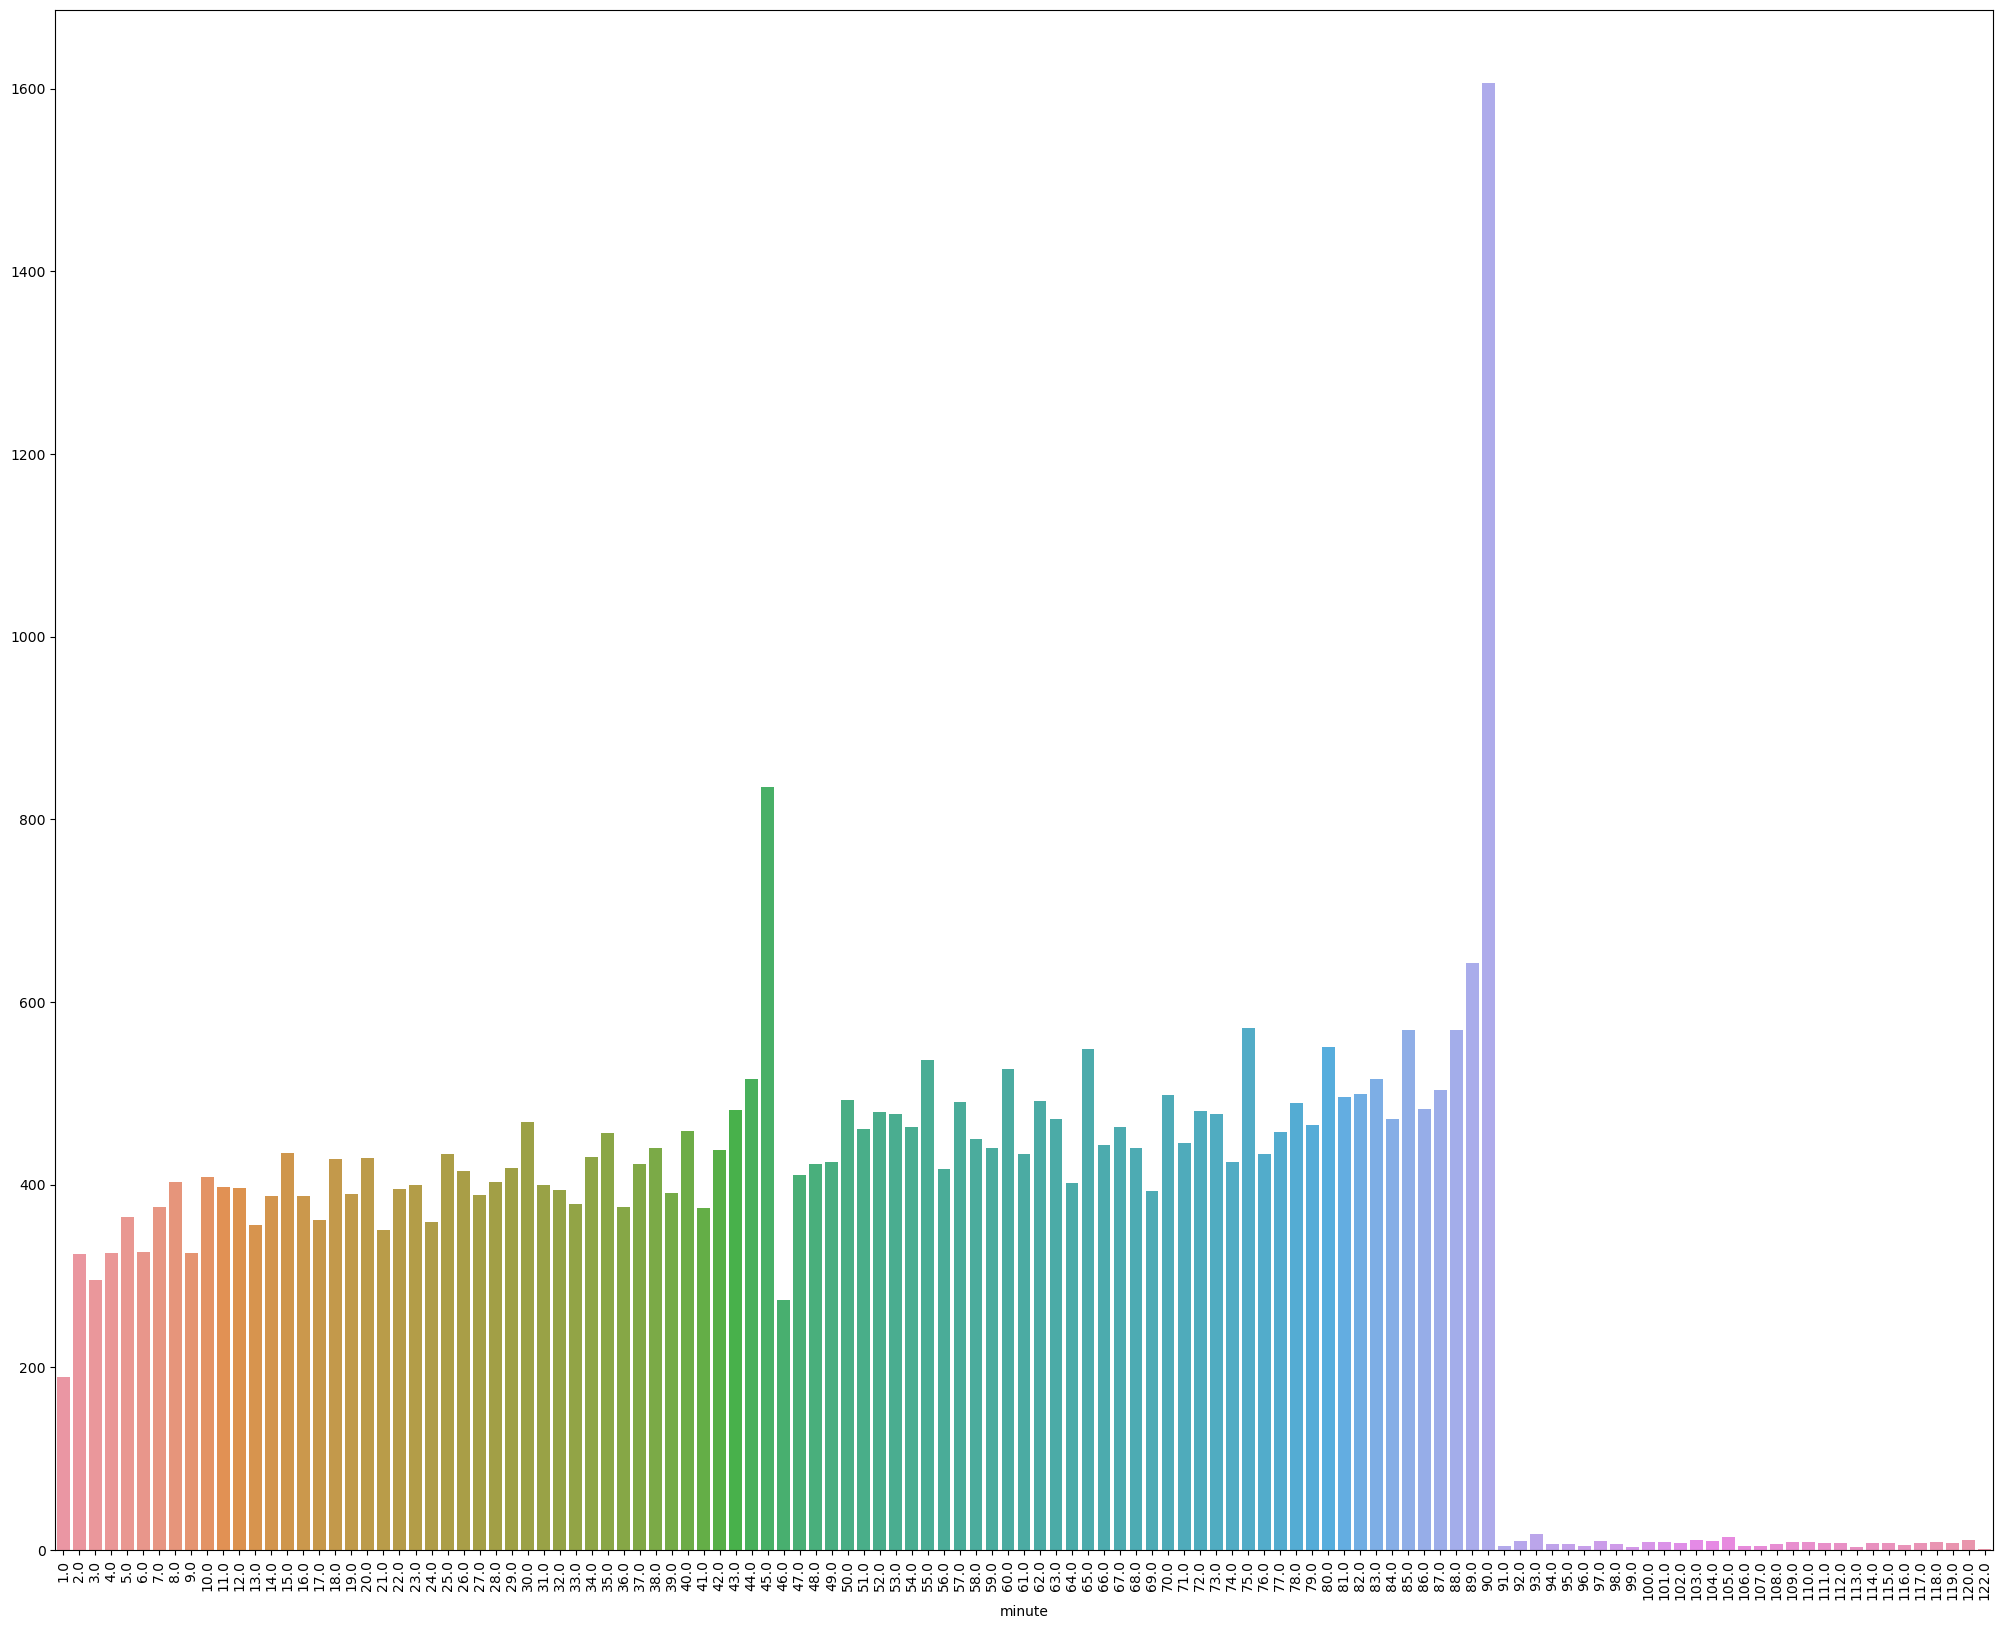

In [6]:
agg_minute = goal_scorers.groupby('minute').size()
plt.figure(figsize=(25,20))
sns.barplot(x=agg_minute.index, y=agg_minute.values)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='minute'>

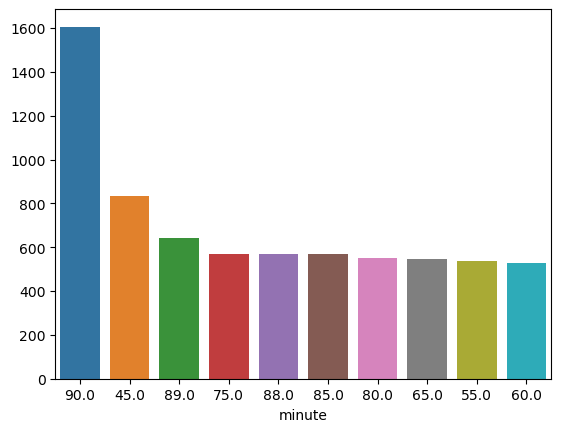

In [7]:
top_minutes_goals = agg_minute.sort_values(ascending=False).head(10)
sns.barplot(x=top_minutes_goals.index, y=top_minutes_goals.values, order=top_minutes_goals.index)

In [8]:
# Which 10 players have scored the most hat-tricks?
goals_per_match = goal_scorers.groupby(['date','scorer']).size().reset_index(name='goals')
hattricks = goals_per_match[goals_per_match['goals'] >= 3]

hattricks_count = hattricks.groupby('scorer').size().sort_values(ascending=False)
hattricks_count.head(10)


scorer
Cristiano Ronaldo     9
Robert Lewandowski    6
Damian Mori           5
Harry Kane            5
Vaughan Coveny        5
Gerd Müller           4
Yang Xu               4
Just Fontaine         4
Eran Zahavi           3
Steve Sumner          3
dtype: int64

In [9]:
# 4. What is the proportion of games won by each team at home and away? What is the difference between the proportions?
home_wins = results[results['home_team'] == results['winner']].groupby('home_team').size()
away_wins = results[results['away_team'] == results['winner']].groupby('away_team').size()

total_home_wins = results.groupby('home_team').size()
total_away_wins = results.groupby('away_team').size()

home_win_proportion = home_wins / total_home_wins
away_win_proportion = away_wins / total_away_wins

home_away_difference = home_win_proportion.subtract(away_win_proportion)

proportions_df = pd.DataFrame(
 {   "Home Win Proportion" : home_win_proportion,
    "Away Win Proportion" : away_win_proportion,
    "Difference" : home_away_difference
 }
)

display(proportions_df.sort_values(by='Difference', ascending=False).head(5))
display(proportions_df.sort_values(by='Difference').head(5))

,Home Win Proportion,Away Win Proportion,Difference
Hmong,1.000000,0.000000,1.000000
Parishes of Jersey,1.000000,0.000000,1.000000
Central Spain,1.000000,0.000000,1.000000
Western Sahara,0.666667,0.000000,0.666667
Western Australia,1.000000,0.419355,0.580645


,Home Win Proportion,Away Win Proportion,Difference
Corsica,0.375000,1.000000,-0.625000
Kabylia,0.000000,0.600000,-0.600000
Kernow,0.444444,1.000000,-0.555556
Western Armenia,0.200000,0.727273,-0.527273
Romani people,0.000000,0.500000,-0.500000


In [11]:
# 5. How many games have been won by the home team? And by the away team?

print(home_wins.sum())
print(away_wins.sum())


21882
23052
